# Matplotlib

### import library


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import mplfinance as mpf

df=pd.read_csv('Video.csv',engine='pyarrow' , dtype_backend='pyarrow')

In [4]:
df['Critic_Score2']=df['Critic_Score'] / 10
df['Critic_Score2'] = df['Critic_Score2'].fillna(df['Critic_Score2'].mean())
df['User_Score']    = df['User_Score'].fillna(df['User_Score'].mean())

df = df[df['Year_of_Release']  > 2015]


df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critic_Score2
94,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85,41,5.0,398,"EA Sports, EA Vancouver",E,8.5
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,Nintendo,2.98,1.45,2.26,0.45,7.14,<NA>,<NA>,7.125046,<NA>,<NA>,<NA>,6.896768
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.85,2.5,0.19,0.85,5.38,93,113,7.9,7064,Naughty Dog,T,9.3
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,1.61,2.0,0.15,0.71,4.46,77,82,3.4,1129,Infinity Ward,M,7.7
289,Battlefield 1,PS4,2016,Shooter,Electronic Arts,1.1,2.15,0.21,0.61,4.08,88,31,8.4,809,EA DICE,M,8.8
325,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.35,1.7,0.15,0.6,3.8,80,64,7.0,2219,Massive Entertainment,M,8.0
571,FIFA 17,XOne,2016,Sports,Electronic Arts,0.43,2.05,0.0,0.17,2.65,84,50,5.5,201,"EA Sports, EA Vancouver",E,8.4
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,Activision,1.46,0.74,0.0,0.22,2.42,78,17,3.1,290,Infinity Ward,M,7.8
708,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.6,1.25,0.06,0.35,2.26,76,91,6.3,635,Ubisoft Montreal,M,7.6
709,Battlefield 1,XOne,2016,Shooter,Electronic Arts,1.28,0.77,0.0,0.2,2.25,87,37,8.2,440,EA DICE,M,8.7


### Scatter Plot

Text(4, 9, 'Top Rated')

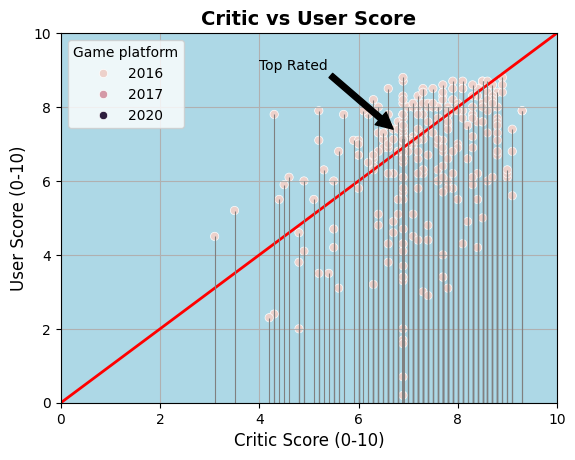

In [5]:
sns.scatterplot(
    data=df,
    x='Critic_Score2',
    y='User_Score',
    marker='o',
    hue='Year_of_Release',
    alpha=1,
    legend='full',
)
x_vals = np.linspace(0, 10, 100)
plt.plot(x_vals, x_vals, color='red', linestyle='-', linewidth=2)

plt.title("Critic vs User Score", fontsize=14, fontweight='bold')

plt.vlines(x=df['Critic_Score2'], ymin=0, ymax=df['User_Score'],
           colors='gray', linestyles='-', linewidth=0.8)

plt.gca().set_facecolor("lightblue") 
plt.xlabel("Critic Score (0-10)", fontsize=12)
plt.ylabel("User Score (0-10)", fontsize=12)

plt.grid(True, linestyle='-', alpha=1)

plt.xlim(0, 10)   # محور X از 0 تا 10
plt.ylim(0, 10)   # محور Y از 0 تا 10

plt.legend(title="Game platform", loc="best")


plt.annotate("Top Rated", xy=(6.7,7.4), xytext=(4,9),
             arrowprops=dict(facecolor='black', shrink=0))
#shrink=0:فلش کامل از متن تا نقطه کشیده میشه
#shrink=0.05:فلش 5٪ کوتاه‌تر میشه (یعنی کمی فاصله می‌گیره)
#shrink=0.2:فلش 20٪ کوتاه‌تر میشه

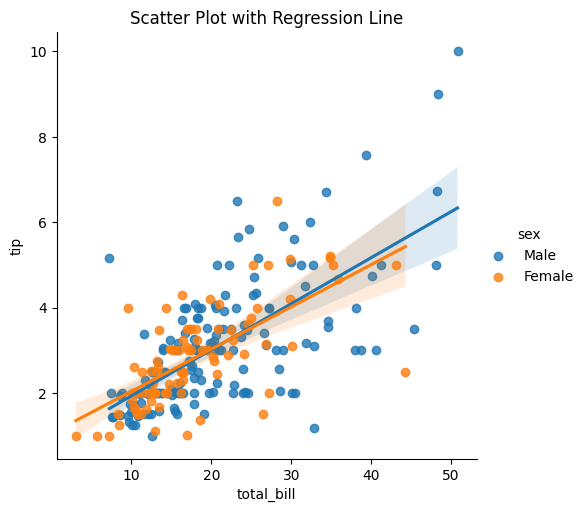

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
tips = sns.load_dataset("tips")

# Create scatter plot with regression line
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

plt.title('Scatter Plot with Regression Line')
plt.show()

### Line Plot

In [7]:
car=pd.read_csv('car.csv')
car.loc[car['price'].isin(['$null$']), 'price'] = np.nan
car['price'] = pd.to_numeric(car['price'], errors='coerce')
car['price'] = car['price'].fillna(car['price'].mean())
#sales
car.loc[car['sales'].isin(['$null$']), 'sales'] = np.nan
car['sales'] = pd.to_numeric(car['sales'], errors='coerce')
car['sales'] = car['sales'].fillna(car['sales'].mean())
car['manufact'].value_counts().sort_values(ascending=False)
selected = car[car['manufact'].isin(['Ford', 'Dodge'])]
selected.to_csv("selcar.csv", index=False)
selcar=pd.read_csv('selcar.csv')



selcar.sort_values('sales',ascending=False)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
21,Ford,F-Series,540.561,15.075,1.0,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.000,6.293,0.0
17,Ford,Explorer,276.747,16.640,1.0,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.000,5.623,0.0
14,Ford,Taurus,245.815,10.055,0.0,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.000,5.505,0.0
5,Dodge,Ram Pickup,227.061,15.060,1.0,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.000,5.425,0.0
20,Ford,Ranger,220.650,7.850,1.0,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.000,5.397,0.0
10,Dodge,Caravan,181.749,12.025,1.0,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.000,5.203,0.0
15,Ford,Focus,175.670,$null$,0.0,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.000,5.169,0.0
18,Ford,Windstar,155.787,13.175,1.0,21.410,3.0,150.0,120.7,76.6,200.9,3.761,26.0,21.000,5.048,0.0
19,Ford,Expedition,125.338,23.575,1.0,36.135,4.6,240.0,119.0,78.7,204.6,4.808,26.0,16.000,4.831,0.0
12,Ford,Mustang,113.369,12.760,0.0,21.560,3.8,190.0,101.3,73.1,183.2,3.203,15.7,24.000,4.731,0.0


C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\822850480.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


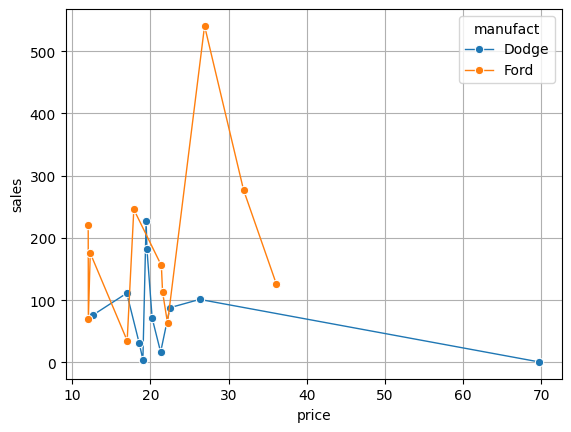

In [8]:

sns.lineplot(
    data=selcar,
    x='price', 
    y='sales',
    hue='manufact',      
    estimator=np.mean,   
    ci=95,        
    sort=True,          
    linewidth=1,        
    linestyle='-',     
    marker='o'          
)

plt.grid(True, linestyle='-', alpha=1)
#plt.gca().set_facecolor("#d7e2f7") 


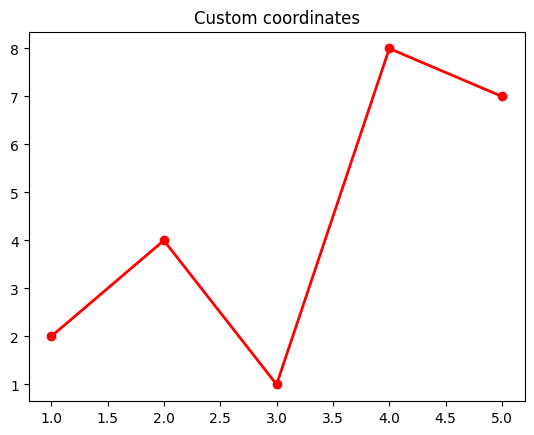

In [9]:
import matplotlib.pyplot as plt

# مختصات دلخواه
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 8, 7]

plt.plot(x, y, color='red', linestyle='-', linewidth=2, marker='o')
plt.title("Custom coordinates")
plt.show()


C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\1748427388.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x="x", y="y", data=df, ci=95)
C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\1748427388.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x="x", y="y", data=df, ci=95)


<Axes: xlabel='x', ylabel='y'>

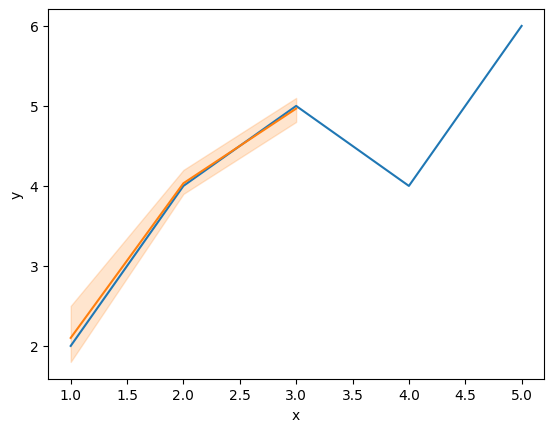

In [10]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [2, 4, 5, 4, 6]
})

# Line plot with 95% confidence interval
sns.lineplot(x="x", y="y", data=df, ci=95)

# Line plot without confidence interval
#sns.lineplot(x="x", y="y", data=df, ci=Noneimport seaborn as sns
import pandas as pd

# Simulated data with repeated x-values
df = pd.DataFrame({
    "x": [1, 1, 1, 2, 2, 2, 3, 3, 3],
    "y": [2, 2.5, 1.8, 4, 4.2, 3.9, 5, 5.1, 4.8]
})

sns.lineplot(x="x", y="y", data=df, ci=95)



### Bar Plot

C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\405220798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

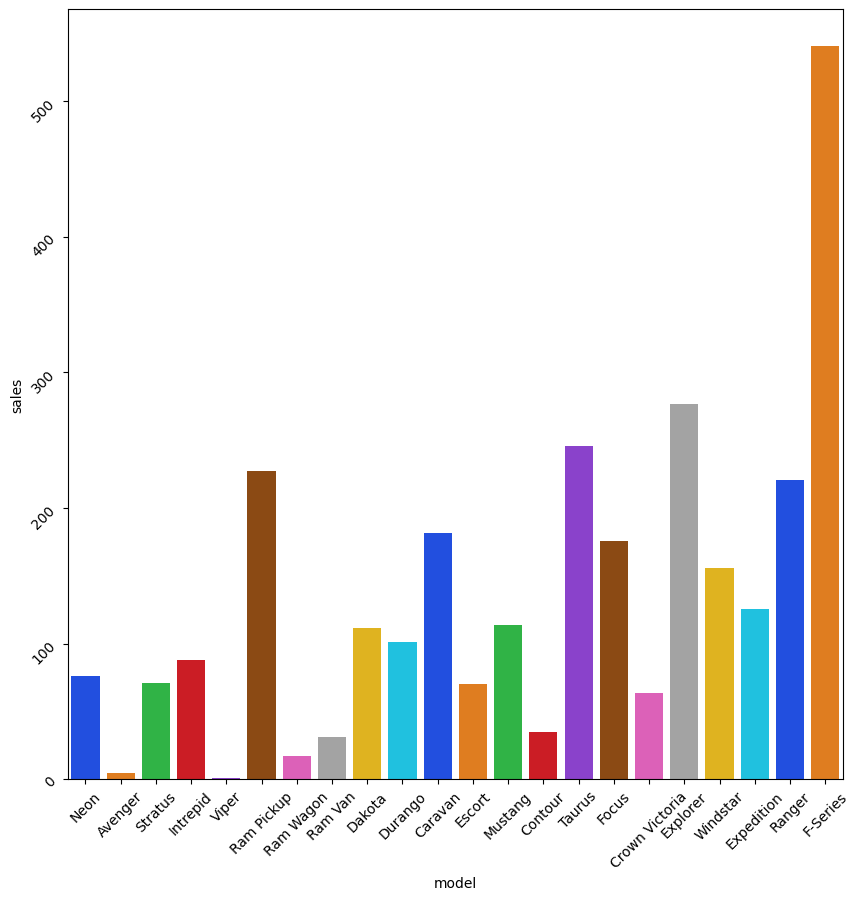

In [11]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(
    data=selcar,
    x='model',
    y='sales',
    palette='bright',
    #order=['cat1','cat2','cat3']
    orient='v',      
    width=0.8         
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

### Histogram

In [12]:
dff=pd.read_csv('Video.csv')
dff.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Global_Sales', ylabel='Count'>

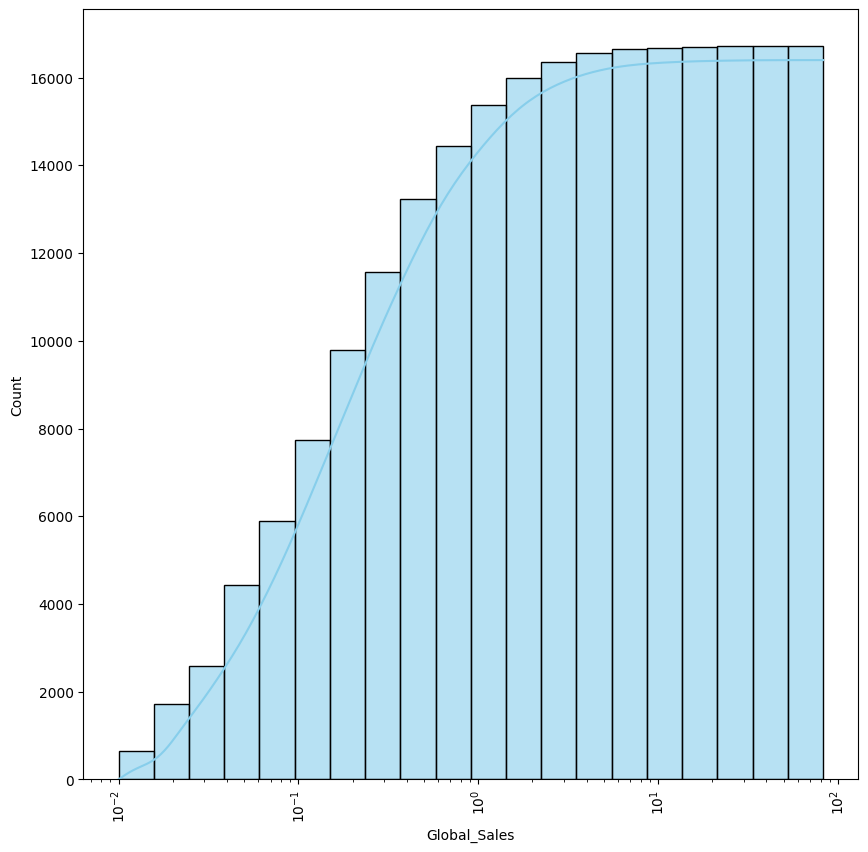

In [13]:
plt.figure(figsize=(10,10),dpi=100)
plt.xticks(rotation=90)
sns.histplot(
    dff['Global_Sales'],
    bins=20,          # تعداد بازه‌ها
    kde=True,         # نمایش منحنی چگالی
    stat='count',   # نوع آمار (count, density, probability)
    color='skyblue',
    alpha=0.6,        # شفافیت
    cumulative=True, # تجمعی یا نه
    log_scale=True  # مقیاس لگاریتمی
)


### BoxPlot

<Axes: xlabel='Manufact', ylabel='sales'>

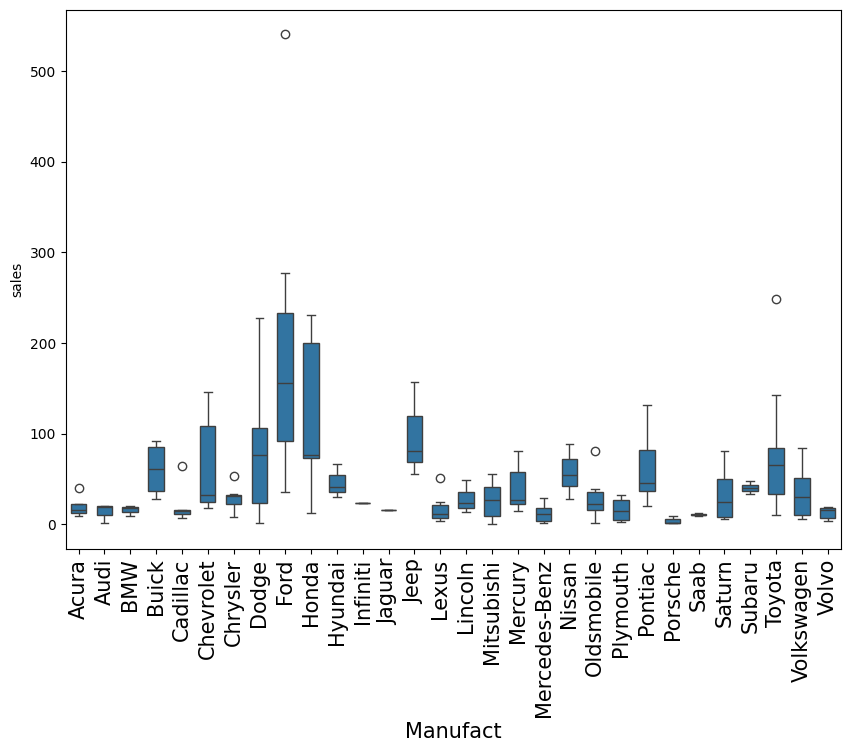

In [14]:
plt.figure(figsize=(10,7),dpi=100)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Manufact',fontsize=15)
sns.boxplot(
    data=car,
    x='manufact', 
    y='sales',
    showfliers=True,
    patch_artist=True, 
    notch=False,     
    width=0.6,       
    orient='v'       
)


<Axes: >

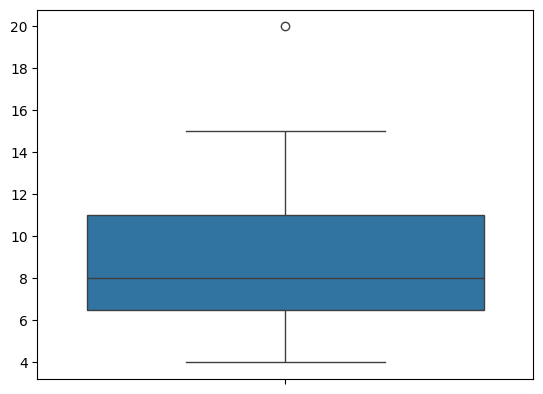

In [15]:
import matplotlib.pyplot as plt

# نمونه داده
data =[7, 8, 5, 10, 12, 4, 6, 8, 9, 15, 20]

# رسم Boxplot
sns.boxplot(
    data=data,
)

# نمایش نمودار



Q1: 6.5
Median: 8.0
Q3: 11.0
حداقل بدون پرت: 4
حداکثر بدون پرت: 15
نقاط پرت: [20]


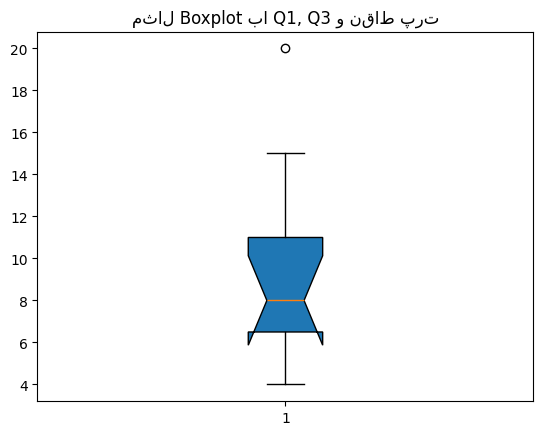

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# داده نمونه
data = [7, 8, 5, 10, 12, 4, 6, 8, 9, 15, 20]

# محاسبه Q1, Q3, Median
Q1 = np.percentile(data, 25)   # 25 درصد داده ها پایین تر
Median = np.median(data)       # میانه
Q3 = np.percentile(data, 75)   # 75 درصد داده ها پایین تر

IQR = Q3 - Q1                   # فاصله بین Q1 و Q3

# محدوده whiskers (حداقل و حداکثر بدون نقاط پرت)
lower_whisker = min([x for x in data if x >= Q1 - 1.5*IQR])
upper_whisker = max([x for x in data if x <= Q3 + 1.5*IQR])

# شناسایی نقاط پرت
outliers = [x for x in data if x < lower_whisker or x > upper_whisker]

print("Q1:", Q1)
print("Median:", Median)
print("Q3:", Q3)
print("حداقل بدون پرت:", lower_whisker)
print("حداکثر بدون پرت:", upper_whisker)
print("نقاط پرت:", outliers)

# رسم Boxplot
plt.boxplot(data, notch=True, vert=True, patch_artist=True, showfliers=True)
plt.title("مثال Boxplot با Q1, Q3 و نقاط پرت")
plt.show()


### Clean Outliers

In [17]:
import numpy as np

data = np.array([-4,4, 5, 6, 7, 8, 8, 9, 10, 12, 15, 20, 30])  # داده نمونه
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

clean_data = data[(data >= lower) & (data <= upper)]
print(clean_data)


[ 4  5  6  7  8  8  9 10 12 15 20]


### Candlestick

In [18]:
import mplfinance as mpf
import pandas as pd

# خواندن فایل و تبدیل تاریخ
dfb = pd.read_csv('bitcoin.csv')
dfb['date'] = pd.to_datetime(dfb['date'], dayfirst=True)  # اگر فرمت DD-MM-YYYY است
dfb.set_index('date', inplace=True)

# رسم Candlestick



C:\Users\hessa\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


<Figure size 500x500 with 0 Axes>

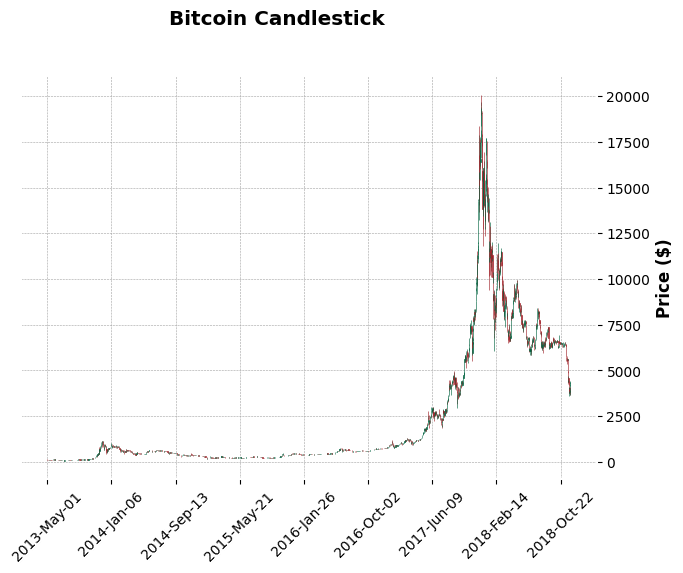

In [19]:
plt.figure(figsize=(5,5),dpi=100)
mpf.plot(
    dfb, 
    type='candle',        # نمودار شمعی
    style='charles',      # سبک نمایش
    #volume=True,          # حجم معاملات اگر ستون Volume دارید
    title='Bitcoin Candlestick', 
    ylabel='Price ($)', 
    ylabel_lower='Volume'
)

### Violin Plot

In [20]:
ath=pd.read_csv('athlete.csv')
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\3447357254.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\hessa\AppData\Local\Temp\ipykernel_16548\3447357254.py:3: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


<Axes: xlabel='Sport', ylabel='Age'>

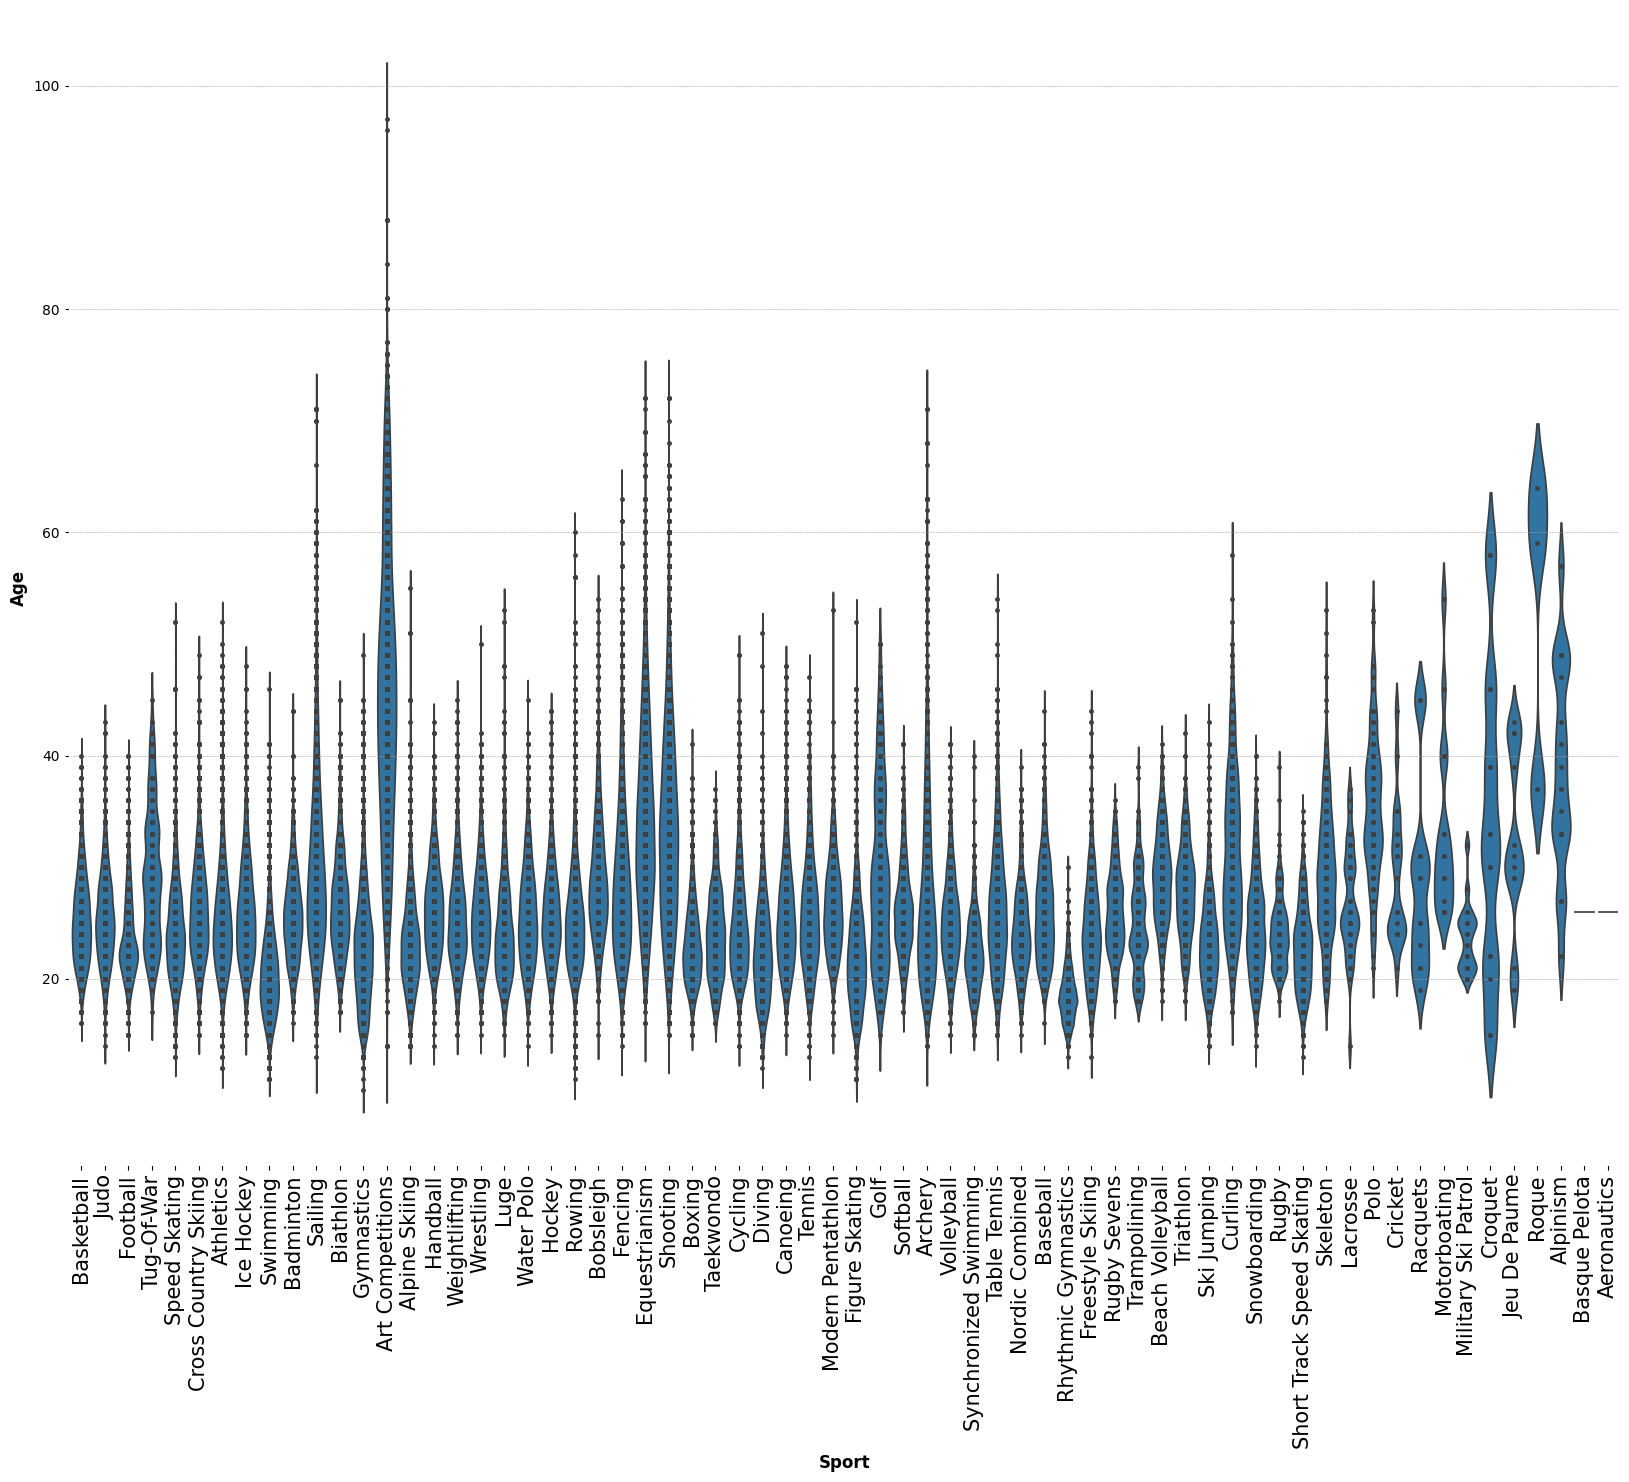

In [21]:
plt.figure(figsize=(20,15),dpi=100)
plt.xticks(rotation=90,fontsize=15)
sns.violinplot(
    data=ath,
    x='Sport', y='Age',
    split=False,      
    inner='point', 
    scale='width',     
    bw=0.2,        
    orient='v'
)


### 3D Plot

In [22]:
car.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500000,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400000,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,27.396605,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990000,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


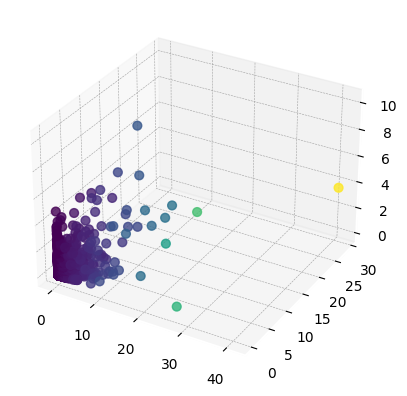

In [23]:
fig=plt.figure(); ax=fig.add_subplot(111, projection='3d')
ax.scatter(
    dff['NA_Sales'], dff['EU_Sales'], dff['JP_Sales'],
    c=dff['NA_Sales'], cmap='viridis',
    s=40, alpha=0.8,
    marker='o', depthshade=True
)


### Pie

In [24]:
drf=pd.read_csv('car.csv')

([<matplotlib.patches.Wedge at 0x198af332e40>,
 [Text(-0.25108937025889777, 1.1222540390406222, 'Ford'),
  Text(-0.7053886742042226, 0.9082548201382744, 'Dodge'),
  Text(-1.0035111123044627, 0.5616631085281109, 'Chevrolet'),
  Text(-1.137073705530227, 0.17194007151260202, 'Mercedes-Benz'),
  Text(-1.1247099667762064, -0.2398488912508564, 'Toyota'),
  Text(-0.9920717113811796, -0.5816302257252606, 'Chrysler'),
  Text(-0.7925809420752304, -0.8332559332276851, 'Mitsubishi'),
  Text(-0.5312941048873512, -1.0199149837667592, 'Nissan'),
  Text(-0.25108904025464424, -1.1222541128746206, 'Mercury'),
  Text(0.02301106829714881, -1.1497697555318733, 'Oldsmobile'),
  Text(0.2957902208537976, -1.111309203258599, 'Lexus'),
  Text(0.5515963422786091, -1.0090795187619555, 'Pontiac'),
  Text(0.7757507685842308, -0.8489468446498729, 'Volvo'),
  Text(0.9553910729972467, -0.6400999122302471, 'Volkswagen'),
  Text(1.072099015269532, -0.4160573295329626, 'Cadillac'),
  Text(1.133405983400481, -0.1946557905

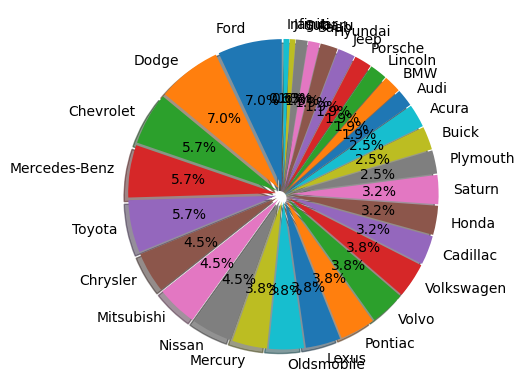

In [25]:
counts = drf['manufact'].value_counts()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    explode=[0.05]*len(counts),
    shadow=True,
    startangle=90,
    #colors=['red','blue','green','orange']
)


In [26]:
ex=pd.read_csv('Expenses.csv')
ex.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [ ]:
counts = ex['Category'].value_counts()
counts.head()

Category
Food              156
Other              60
Transportation     31
Apparel             7
Household           6
Name: count, dtype: int64

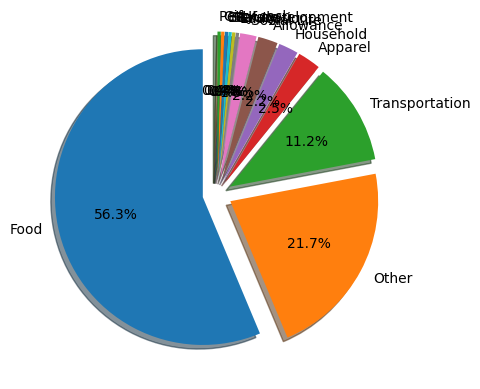

In [ ]:
counts = ex['Category'].value_counts()

plt.pie(
    counts,                     # numeric values
    labels=counts.index,        # category names
    autopct='%1.1f%%',
    explode=[0.1]*len(counts),
    shadow=True,
    startangle=90
)
plt.show()


### Heatmap

In [28]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
dfh['Height']=dfh['Height'].astype(float)
dfh.info()

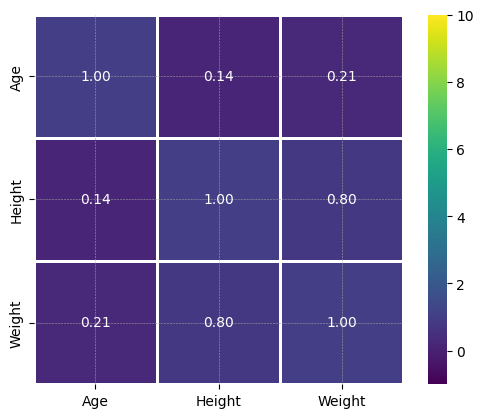

In [ ]:
dfh = ath[['Age','Height','Weight']].corr()
sns.heatmap(
    dfh,
    annot=True, 
    cmap='viridis',
    vmin=-1, 
    vmax=1,
    linewidths=1, 
    square=True,
    fmt='.2f'
)
plt.show()


In [ ]:
dfh = ath[['Age','Height','Weight']]
dfh.head()


,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0


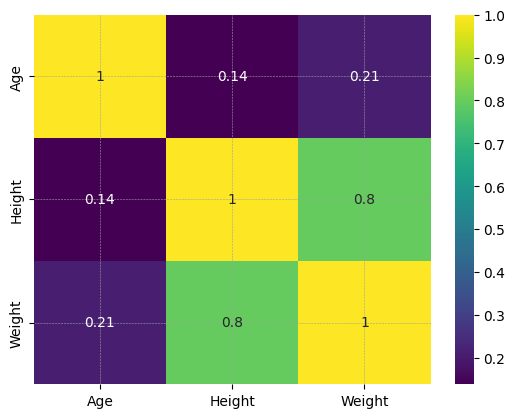

In [ ]:

sns.heatmap(
    dfh,
    annot=True, cmap='viridis',
)
plt.show()


In [ ]:
#Age and Age    1.00    Perfect correlation with itself    Always 1 because each variable is fully correlated with itself
#Age and Height 0.14    Weak positive correlation          As age increases, height increases slightly but the relationship is weak
#Age and Weight 0.21    Weak positive correlation          Age has a slight relation with weight but not very strong
#Height and Height 1.00 Perfect correlation with itself    Always 1
#Height and Weight 0.80 Strong positive correlation        Height and weight have a strong relation; taller people are usually heavier
#Weight and Weight 1.00 Perfect correlation with itself    Always 1


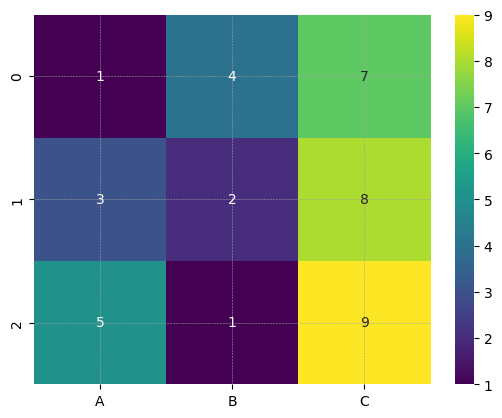

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "A": [1, 3, 5],
    "B": [4, 2, 1],       
    "C": [7, 8, 9]
})
df.head()
sns.heatmap(df, annot=True, cmap="viridis")
plt.show()
